<a href="https://colab.research.google.com/github/Kongara-Vijitha/Music_player/blob/main/ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install catboost
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/Loan_default.csv.zip")

In [ ]:
df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [ ]:
df.tail(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255337,DSL4O0KAWD,64,73743,140354,300,0,2,4.12,12,0.24,PhD,Self-employed,Single,Yes,No,Education,Yes,0
255338,6V8S5IUS63,68,21711,168231,352,78,2,9.71,60,0.36,PhD,Full-time,Divorced,Yes,Yes,Home,No,0
255339,O6SWO6CBGB,51,69492,122962,348,66,2,10.83,48,0.27,High School,Part-time,Divorced,No,No,Home,No,0
255340,48LOOK4VR1,41,61809,119238,444,34,2,19.99,36,0.31,Master's,Part-time,Married,Yes,Yes,Auto,Yes,0
255341,AKXAXQN7PG,40,129890,116119,701,38,3,9.91,24,0.23,High School,Part-time,Divorced,Yes,No,Home,Yes,1
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [ ]:
df.shape

(255347, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
df.drop(columns = ["LoanID"] , errors="ignore", inplace = True)

<Figure size 800x400 with 0 Axes>

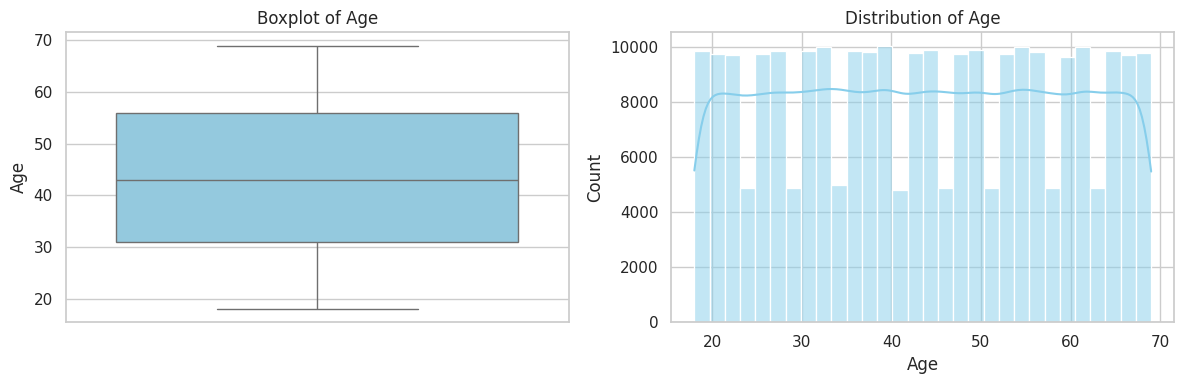

<Figure size 800x400 with 0 Axes>

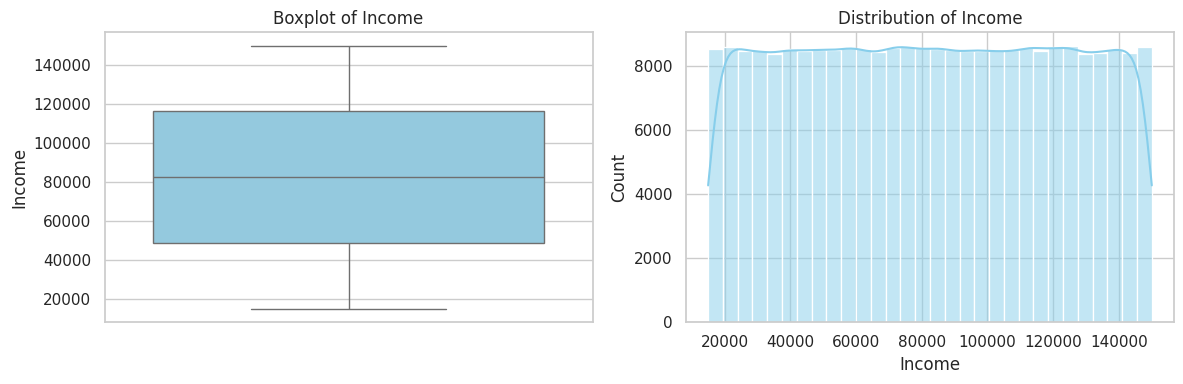

<Figure size 800x400 with 0 Axes>

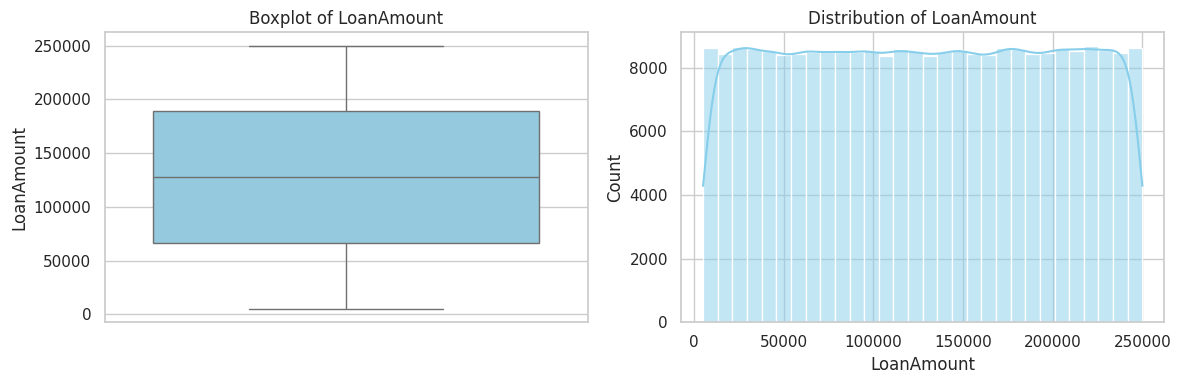

<Figure size 800x400 with 0 Axes>

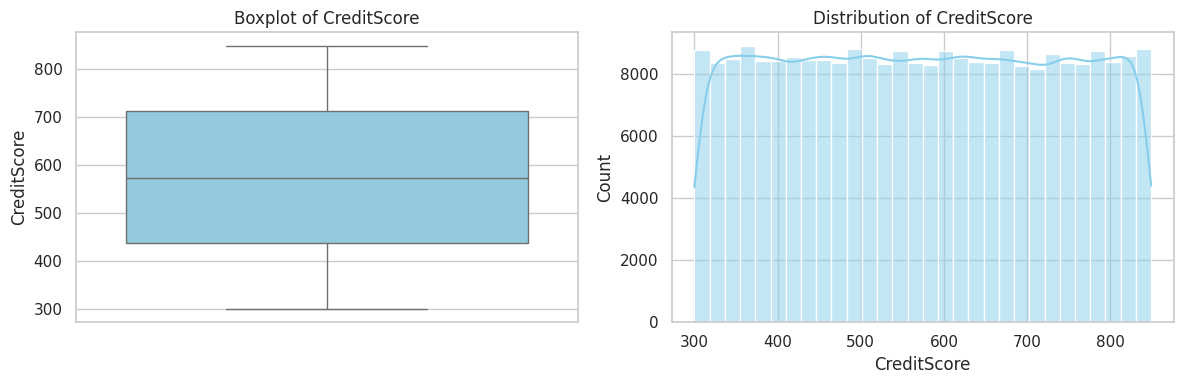

<Figure size 800x400 with 0 Axes>

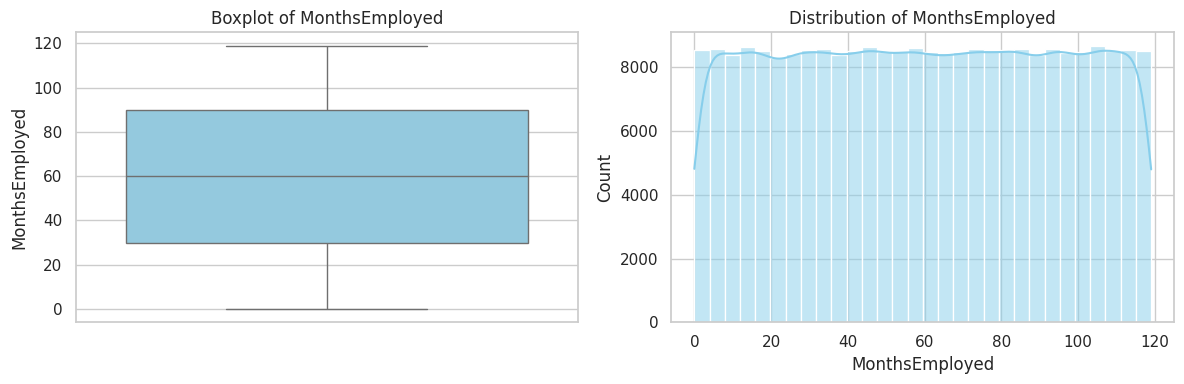

<Figure size 800x400 with 0 Axes>

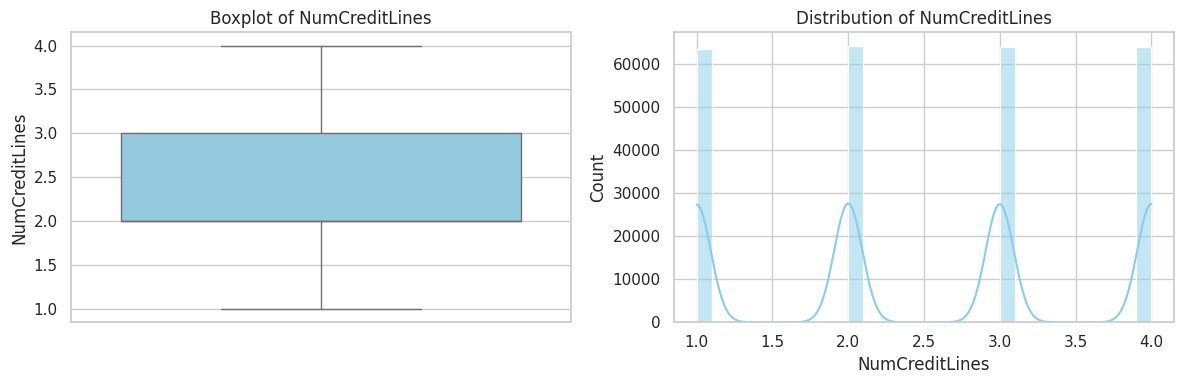

<Figure size 800x400 with 0 Axes>

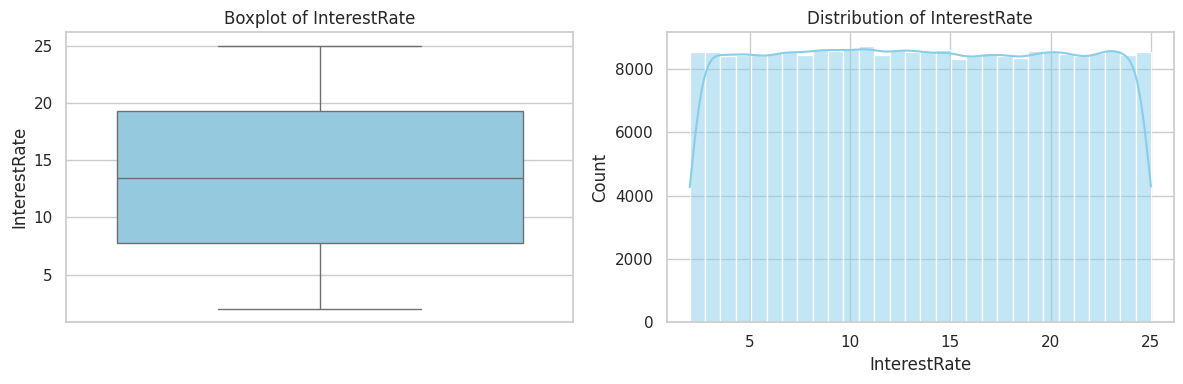

<Figure size 800x400 with 0 Axes>

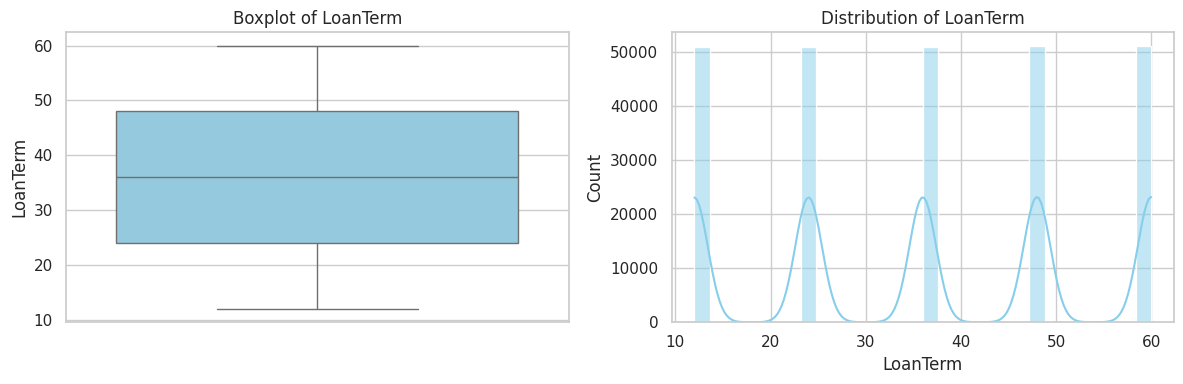

<Figure size 800x400 with 0 Axes>

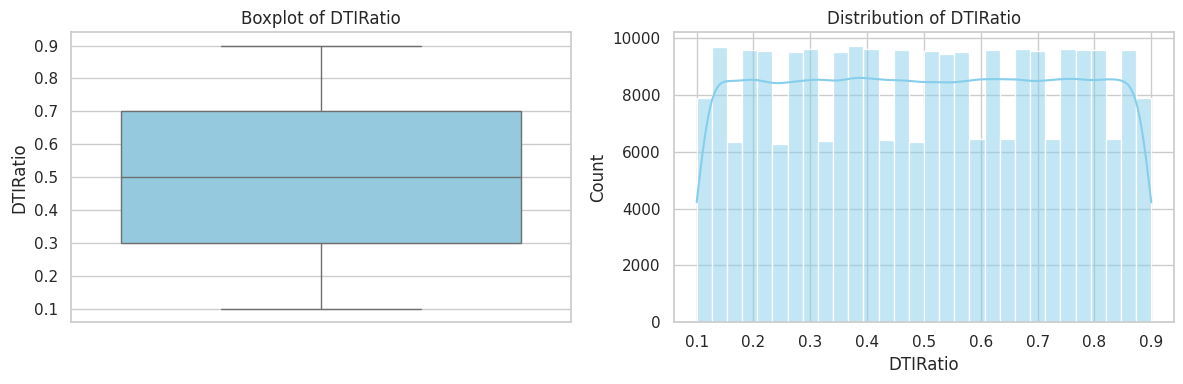

<Figure size 800x400 with 0 Axes>

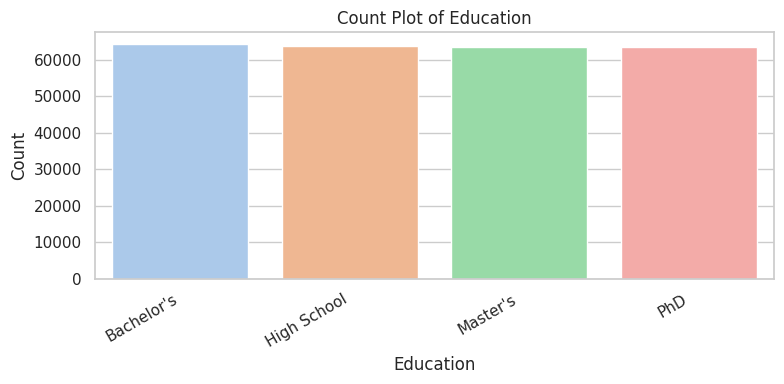

<Figure size 800x400 with 0 Axes>

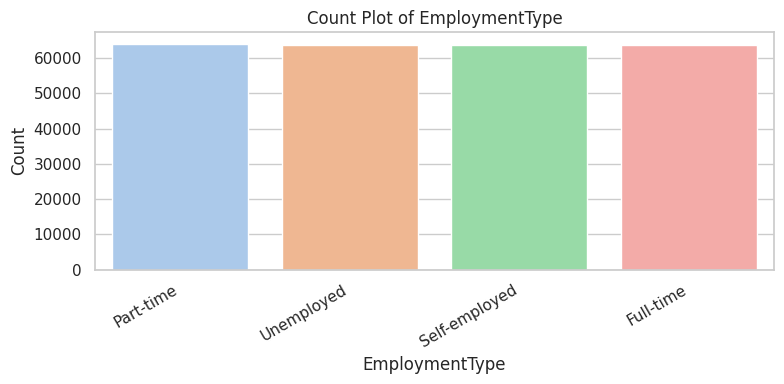

<Figure size 800x400 with 0 Axes>

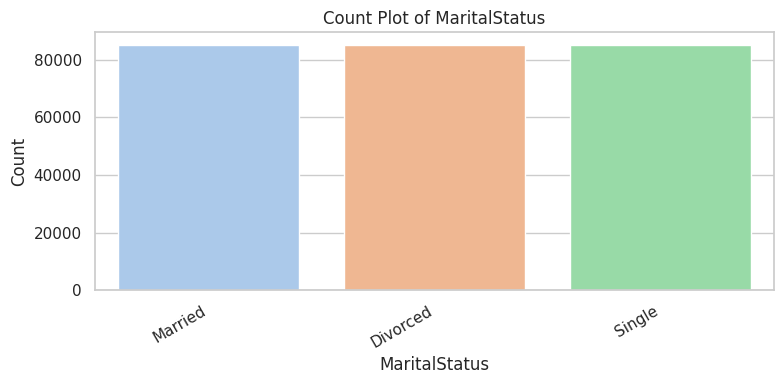

<Figure size 800x400 with 0 Axes>

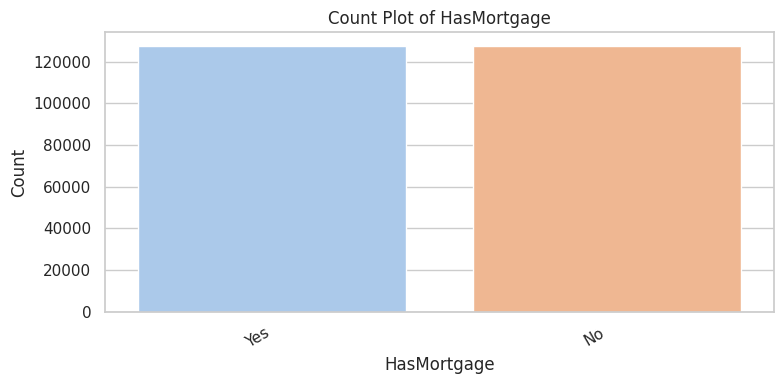

<Figure size 800x400 with 0 Axes>

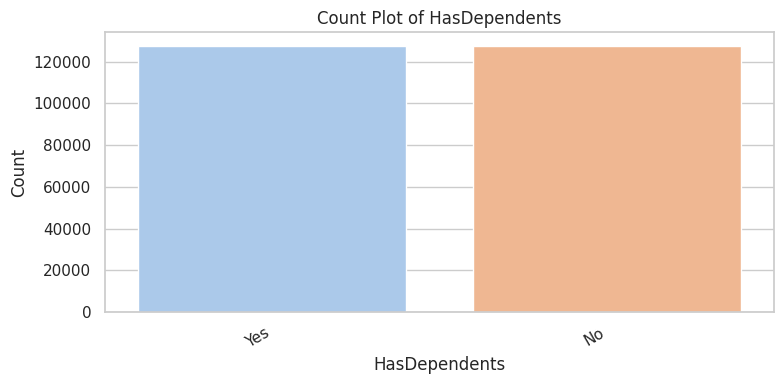

<Figure size 800x400 with 0 Axes>

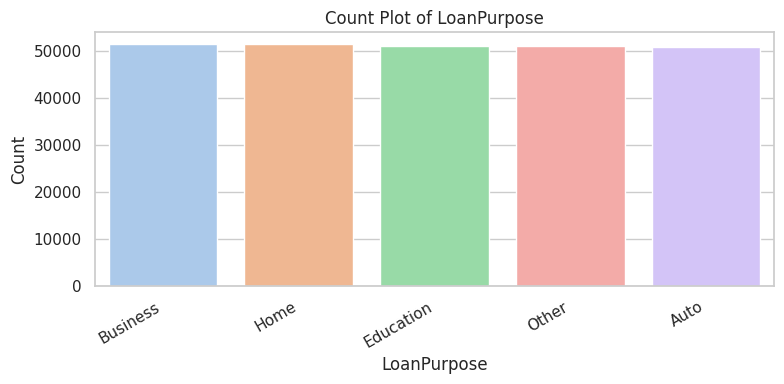

<Figure size 800x400 with 0 Axes>

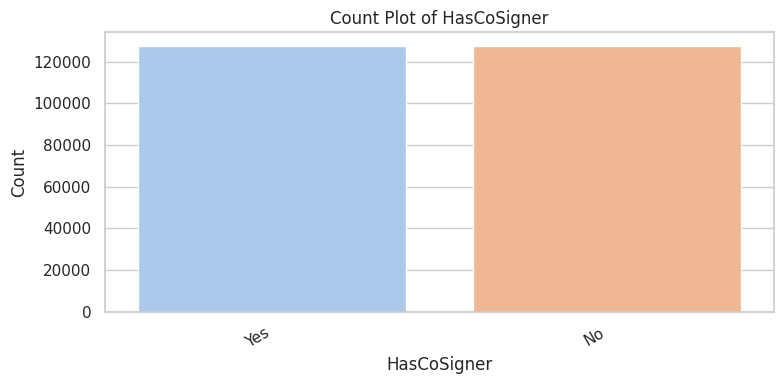

<Figure size 800x400 with 0 Axes>

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

for col in df.columns:
    plt.figure()

    if col == 'Default':
        continue
    # Numeric features
    if pd.api.types.is_numeric_dtype(df[col]):
        # Use both boxplot + histogram for a balanced view
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.boxplot(y=df[col], ax=axes[0], color="skyblue")
        axes[0].set_title(f"Boxplot of {col}")
        axes[0].set_ylabel(col)

        # Histogram — shows distribution shape
        sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[1], color="skyblue")
        axes[1].set_title(f"Distribution of {col}")
        axes[1].set_xlabel(col)
        axes[1].set_ylabel("Count")

        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        order = df[col].value_counts().index  # Sort by frequency
        sns.countplot(x=col, data=df, order=order, palette="pastel")
        plt.title(f"Count Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()

In [ ]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['Default']

,Default
Age,-0.167783
Income,-0.099119
LoanAmount,0.086659
CreditScore,-0.034166
MonthsEmployed,-0.097374
NumCreditLines,0.028330
InterestRate,0.131273
LoanTerm,0.000545
DTIRatio,0.019236
Default,1.000000


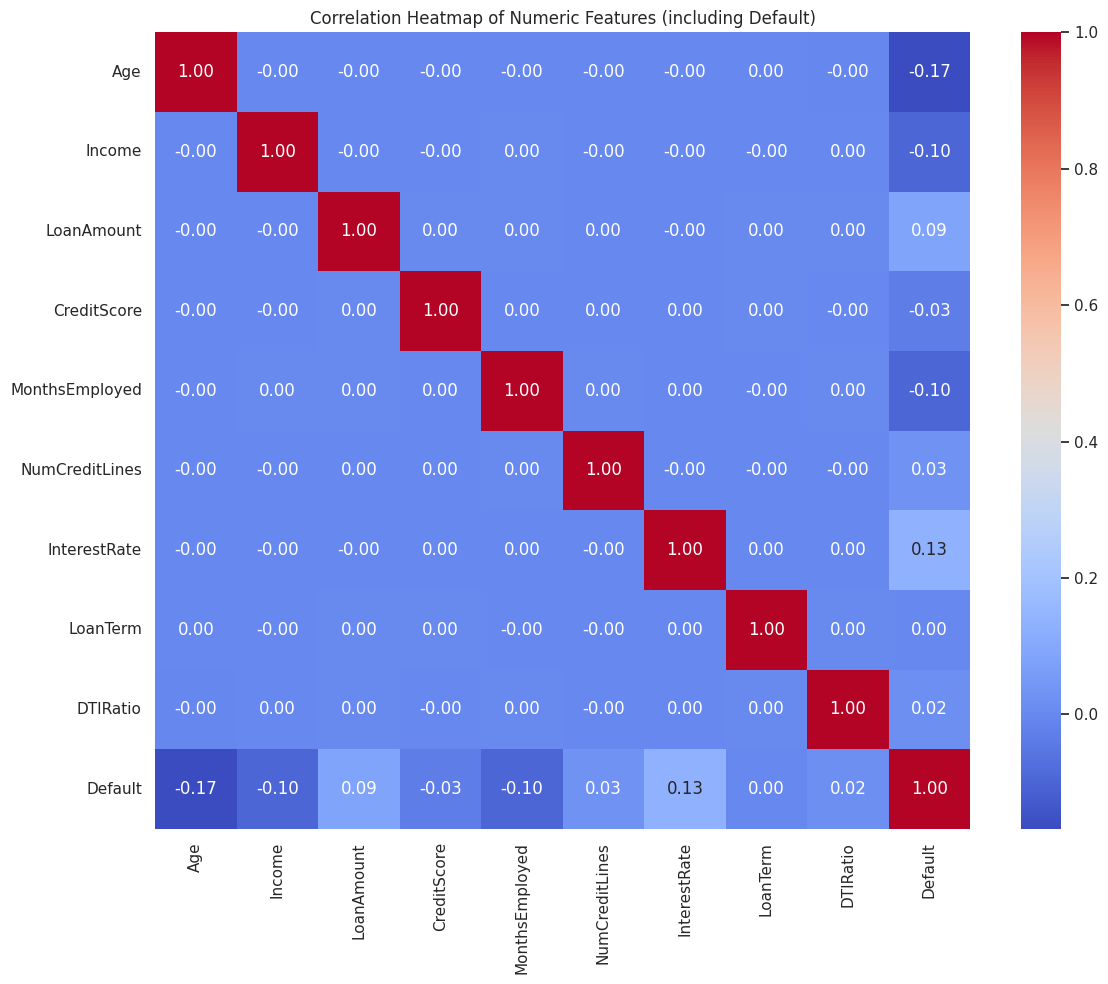

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features (including Default)')
plt.tight_layout()
plt.show()

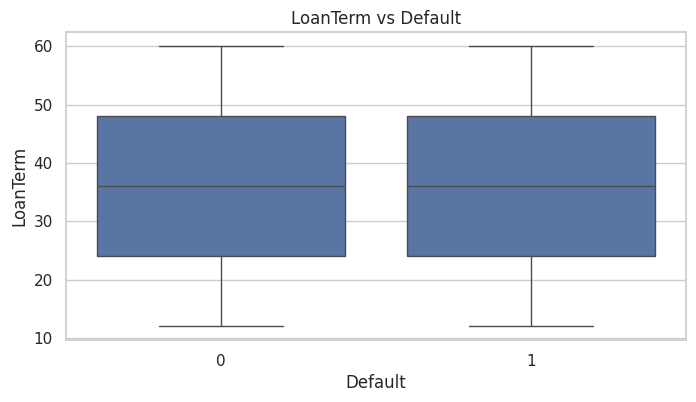

In [ ]:
sns.boxplot(x="Default", y="LoanTerm", data=df)
plt.title("LoanTerm vs Default")
plt.show()

In [ ]:
df.drop(columns = ["LoanTerm"] , inplace = True)

In [ ]:
for col in df.select_dtypes(exclude='number').columns:
    if col == 'Default':
        continue
    print(f"\n🔹 {col}\n")
    print(df.groupby(col)['Default'].value_counts())


🔹 Education

Education    Default
Bachelor's   0          56577
             1           7789
High School  0          55673
             1           8230
Master's     0          56633
             1           6908
PhD          0          56811
             1           6726
Name: count, dtype: int64

🔹 EmploymentType

EmploymentType  Default
Full-time       0          57632
                1           6024
Part-time       0          56484
                1           7677
Self-employed   0          56404
                1           7302
Unemployed      0          55174
                1           8650
Name: count, dtype: int64

🔹 MaritalStatus

MaritalStatus  Default
Divorced       0          74376
               1          10657
Married        0          76433
               1           8869
Single         0          74885
               1          10127
Name: count, dtype: int64

🔹 HasMortgage

HasMortgage  Default
No           0          111909
             1           15761
Yes     

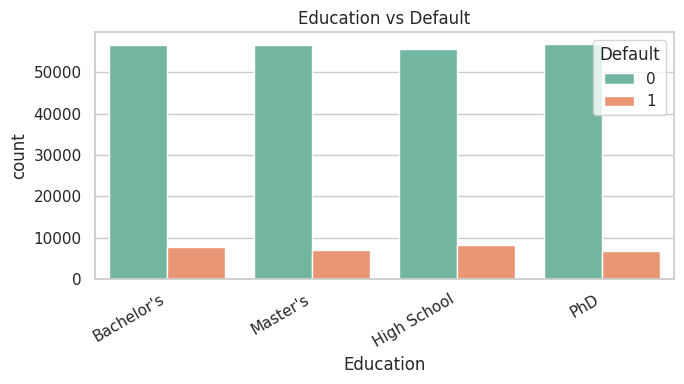

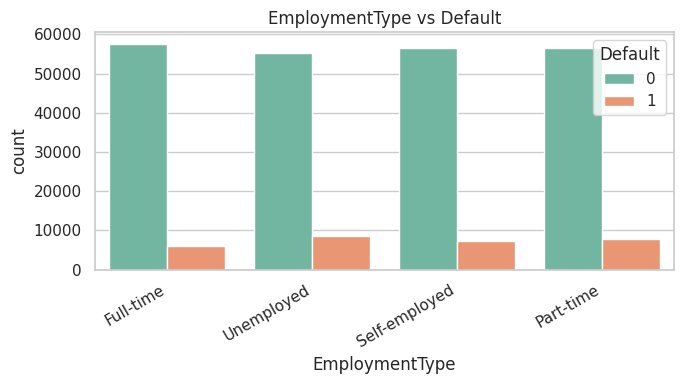

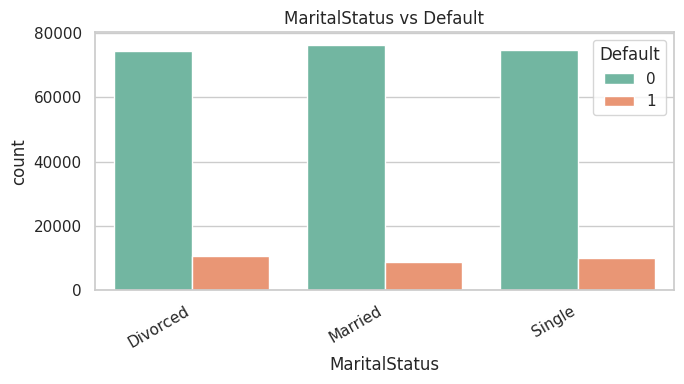

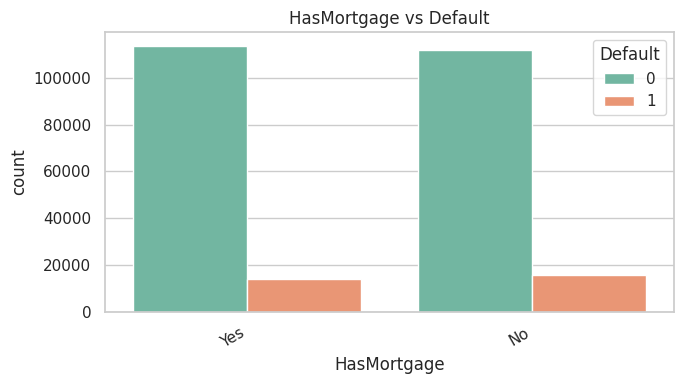

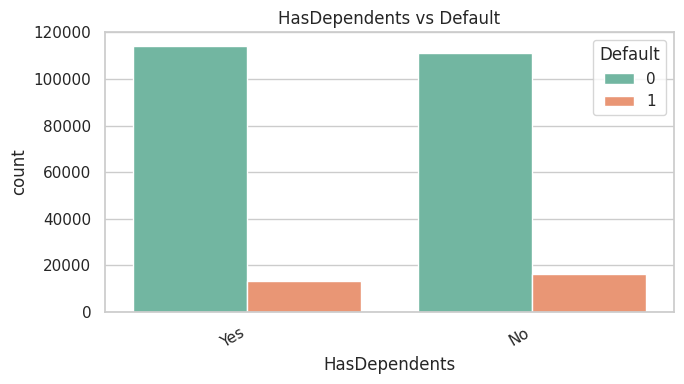

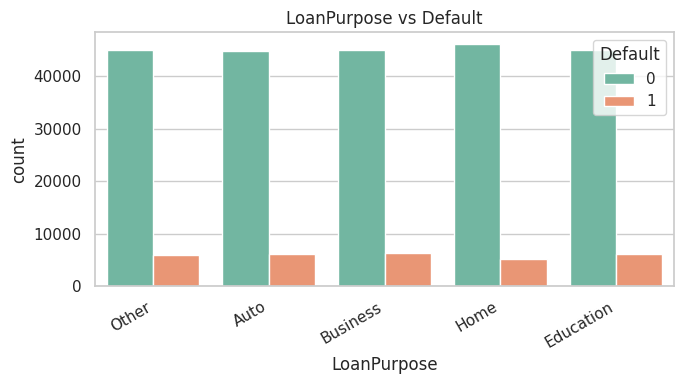

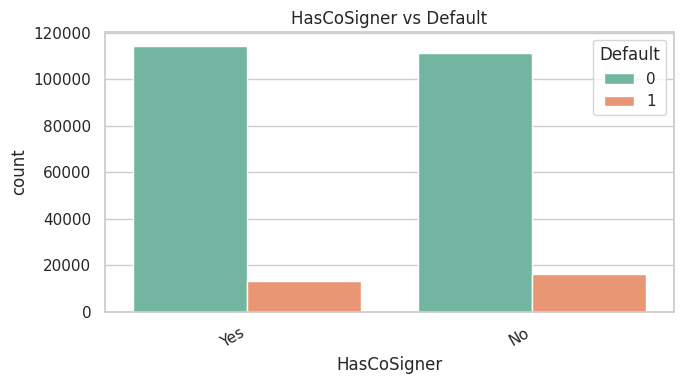

In [ ]:
for col in df.select_dtypes(exclude='number').columns:
    if col == 'Default':
        continue
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='Default', data=df, palette="Set2")
    plt.title(f"{col} vs {'Default'}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
# One Hot Encoding
df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(exclude='number').columns

df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

In [ ]:
df_encoded.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Default,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,0.44,0,False,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,0.68,0,False,...,False,True,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,0.31,1,False,...,True,False,False,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,0.23,0,True,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,0.73,0,False,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   DTIRatio                      255347 non-null  float64
 8   Default                       255347 non-null  int64  
 9   Education_High School         255347 non-null  bool   
 10  Education_Master's            255347 non-null  bool   
 11  Education_PhD                 255347 non-null  bool   
 12  EmploymentType_Part-time      255347 non-nul

In [ ]:
numeric_df = df_encoded.select_dtypes(include='number')
numeric_df.corr()['Default']

,Default
Age,-0.167783
Income,-0.099119
LoanAmount,0.086659
CreditScore,-0.034166
MonthsEmployed,-0.097374
NumCreditLines,0.028330
InterestRate,0.131273
DTIRatio,0.019236
Default,1.000000


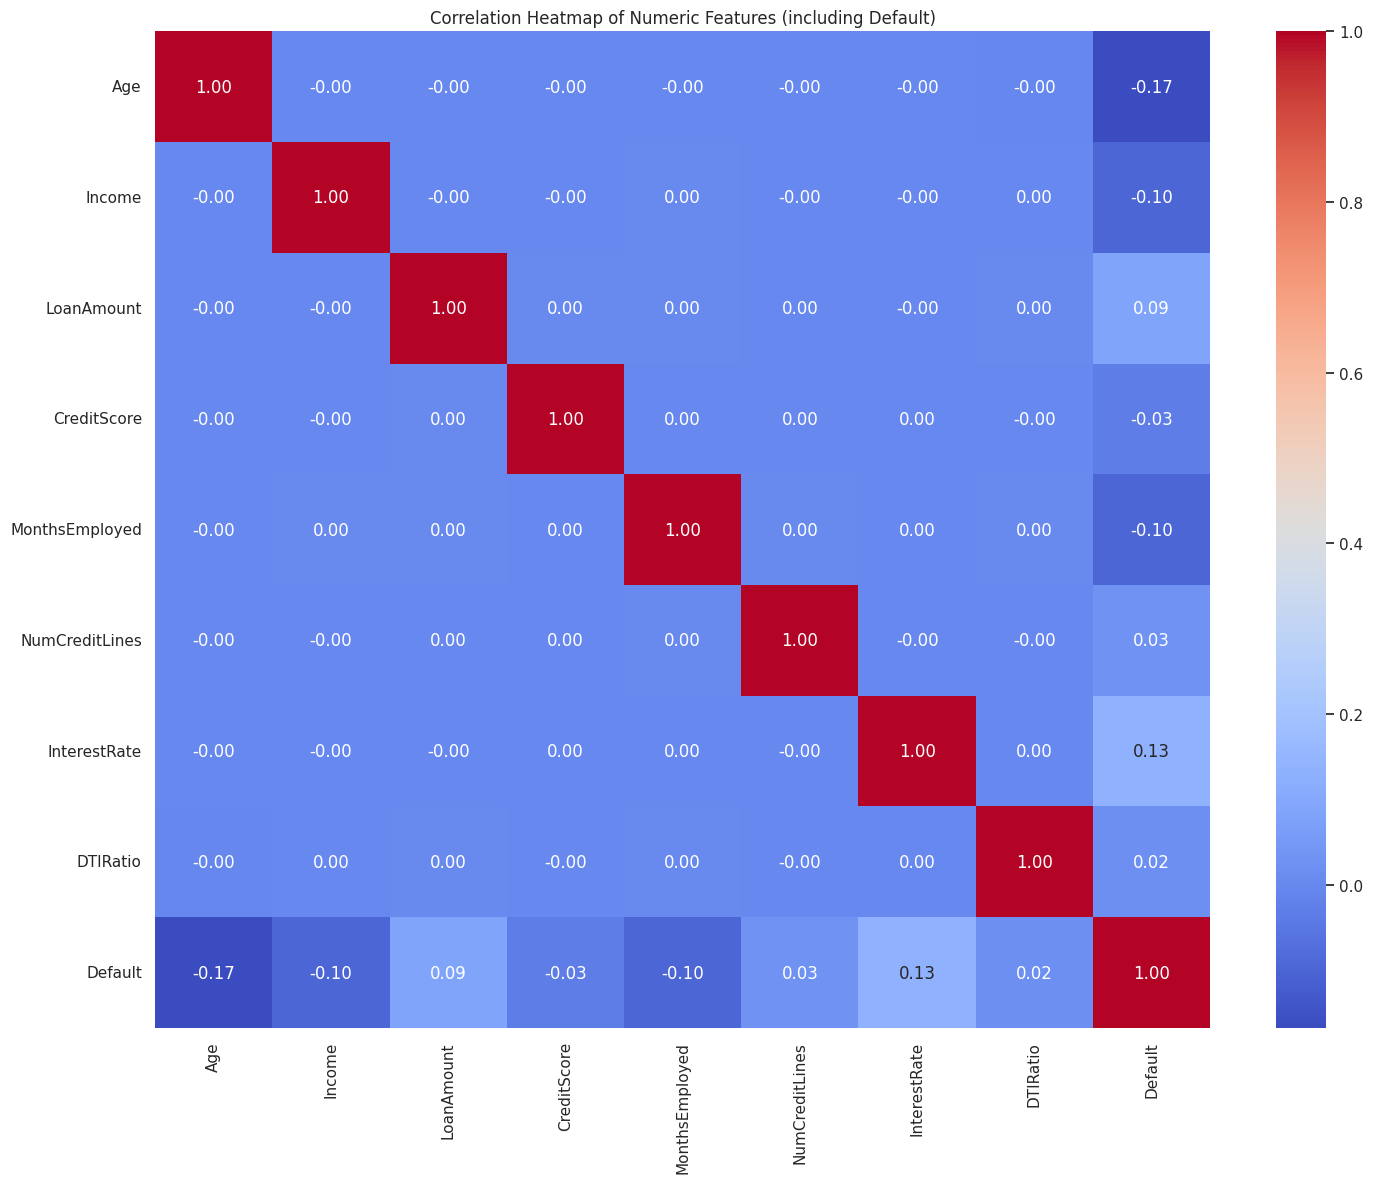

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features (including Default)')
plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = df_encoded.select_dtypes(include='number')
numerical_cols.drop(columns = ['Default'] , inplace = True)

In [ ]:
outliers_count = {}

for col in numerical_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_encoded[(df_encoded[col] < lower) | (df_encoded[col] > upper)]
    outliers_count[col] = len(outliers)

outliers_df = pd.DataFrame(list(outliers_count.items()), columns=["Column", "Outliers_Count"])
outliers_df = outliers_df.sort_values(by="Outliers_Count", ascending=False).reset_index(drop=True)
print(outliers_df)

           Column  Outliers_Count
0             Age               0
1          Income               0
2      LoanAmount               0
3     CreditScore               0
4  MonthsEmployed               0
5  NumCreditLines               0
6    InterestRate               0
7        DTIRatio               0


In [ ]:
y = df_encoded['Default']
X = df_encoded.drop('Default', axis=1)

In [ ]:
# ============================
# Feature Engineering
# ============================

df_encoded["Loan_to_Income"] = df["LoanAmount"] / df["Income"]
df_encoded["Credit_per_Line"] = df["CreditScore"] / df["NumCreditLines"]
df_encoded["EMI_Estimate"] = df["LoanAmount"] / df["MonthsEmployed"].clip(1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )

In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

models = {

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        min_samples_leaf=20,
        max_features="sqrt",
        class_weight={0: 1, 1: 3},
        n_jobs=-1,
        random_state=42

    ),




}

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model=models["Random Forest"]
# 1️⃣ Train base model
model.fit(X_train, y_train)

# 2️⃣ Calibrate the trained model
rf_calibrated = CalibratedClassifierCV(
    model,
    method="sigmoid",
    cv=3
)

rf_calibrated.fit(X_train, y_train)

# 3️⃣ Use calibrated probabilities
y_prob = rf_calibrated.predict_proba(X_test)[:, 1]

# 4️⃣ Apply tuned threshold
threshold = 0.15
y_pred = (y_prob > threshold).astype(int)

# 5️⃣ Store results
results = [{
    "Model": "Random Forest (Calibrated)",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, zero_division=0)
}]


In [ ]:
#from sklearn.calibration import CalibratedClassifierCV

#results = []

#for name, model in models.items():

   # print(f"Training {name}...")


    #model.fit(X_train, y_train)
   # y_pred = model.predict(X_test)
    #y_prob = model.predict_proba(X_test)[:, 1]

# Tuned threshold (better recall)
    #threshold = 0.28
    #y_pred = (y_prob > threshold).astype(int)
    #results.append({
        #"Model": name,
        #"Accuracy": accuracy_score(y_test, y_pred),
        #"Precision": precision_score(y_test, y_pred, zero_division=0),
        #"Recall": recall_score(y_test, y_pred, zero_division=0),
        #"F1 Score": f1_score(y_test, y_pred, zero_division=0)
    #})*/

Training Random Forest...


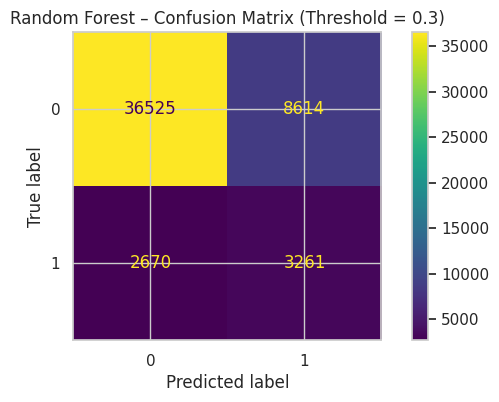

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest – Confusion Matrix (Threshold = 0.3)")
plt.show()

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (Calibrated),0.779048,0.274611,0.549823,0.366281
